In [1]:
# step -1 Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive link for dataset : https://drive.google.com/file/d/1JRZcQJLZvcijMtrztTJrsEExoeFqp8b3/view?usp=sharing

In [9]:
# step -2 Data loading

# Our data is not present in proper format as we cann values are not properly seperated
df = pd.read_csv("bank.csv")xxxxxx
df

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."
...,...
41194,"74;""retired"";""married"";""professional.course"";""..."
41195,"74;NA;""married"";""professional.course"";""no"";""ye..."
41196,"74;""retired"";""married"";NA;""no"";""yes"";""no"";""cel..."
41197,NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;NA;N...


In [10]:
df = pd.read_csv("bank.csv",sep=";") # use ";" to properly seperate the data to give space in between
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,no
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


y is the Target column means whether we can give loan to a person or not ( Yes / No)

In [11]:
# Rename y column to loan_status

df.rename(columns={"y": "Loan_status"} , inplace=True)

In [122]:
df.head(25)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Loan_status
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45.0,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59.0,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41.0,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24.0,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25.0,services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [123]:
# step 3 EDA ( Exploratory Data Analysis)

In [124]:
# Display the full data
# print(df.to_string())

In [12]:
df.shape  # No of rows , No of columns
# 41 thousand 1 hundred 99 rows and 21 columns

(41199, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

**I want to find in my data how many people are having loan values as Yes and No**

In [14]:
# Traget column containing information about load is df["y"]
df["Loan_status"].value_counts()

Loan_status
no     36556
yes     4640
Name: count, dtype: int64

**If i want to count the no of values in job column**

In [15]:
df["job"].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

**If i want a percentage value of any column like how many percent of data a particular value is having in that column**

In [16]:
df["job"].value_counts(normalize=True)*100
# It will return out of total people how much percentage of people are working in each job category

job
admin.           25.299801
blue-collar      22.464437
technician       16.368889
services          9.634898
management        7.098121
retired           4.189931
entrepreneur      3.534495
self-employed     3.449531
housemaid         2.573190
unemployed        2.461524
student           2.124096
unknown           0.801088
Name: proportion, dtype: float64

In [17]:
df["marital"].value_counts(normalize=True)*100

marital
married     60.528232
single      28.081759
divorced    11.195805
unknown      0.194203
Name: proportion, dtype: float64

In [18]:
# Data cleaning
'''
1) Check for Null values

2) Check for Duplicate values

3) Check for Outiers

'''

# 1) Check for Null values
df.isnull().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
Loan_status       3
dtype: int64

In [19]:
df.isnull().sum().sum()

76

In [20]:
df.shape

(41199, 21)

**What to do with these 76 null value when the total data size is 41,119 ?**

In [21]:
# Check the percentage of null value

# If null values are less than 30% of data = DROP THEM
# If null values are greater than 30% of data = REPLACE THEM

ans = (76/41119)*100
print(ans)

# We are having 0.18482939760208175 this much percentage of Null values

0.18482939760208175


In [22]:
# DROP NULL VALUES
# df.dropna(inplace=True)

**Just to teach you how to replace the null values we are not going to drop them , we are goinf to replace them today**

In [23]:
'''
Replace with which value ?

If null value is present in Numerical column : Replace them with Mean / Median of the column .

If null value is present in Object column : Replace them with Mode of the column .
'''
for i in df.columns:
  if df[i].dtype =="float64" or df[i].dtype =="int64":  # If the column is numerical replace with Mean
    df[i].fillna(df[i].mean(),inplace=True)

  else:    # If the column is of object data type
    df[i].fillna(df[i].mode()[0],inplace=True)

print("We have replaced the Null values")

We have replaced the Null values


In [24]:
df.isnull().sum().sum()

0

In [25]:
# 2) Check for Duplicate values

df.duplicated().sum()

16

In [26]:
# Drop the duplicate records
df.drop_duplicates(inplace=True)

In [27]:
df.duplicated().sum()

0

In [28]:
df.columns  # This will return all the column names present in our data in a list

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'Loan_status'],
      dtype='object')

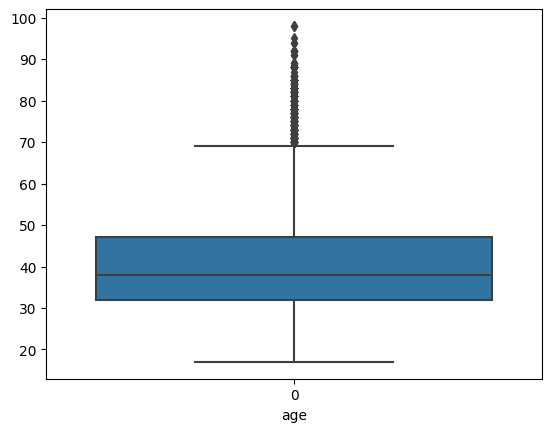

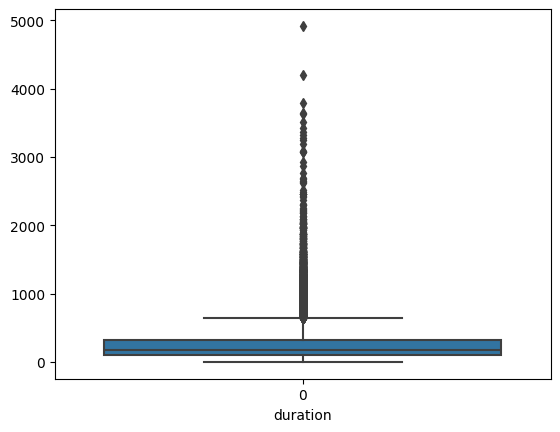

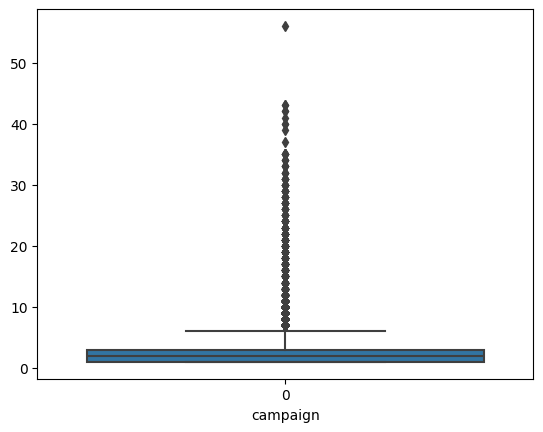

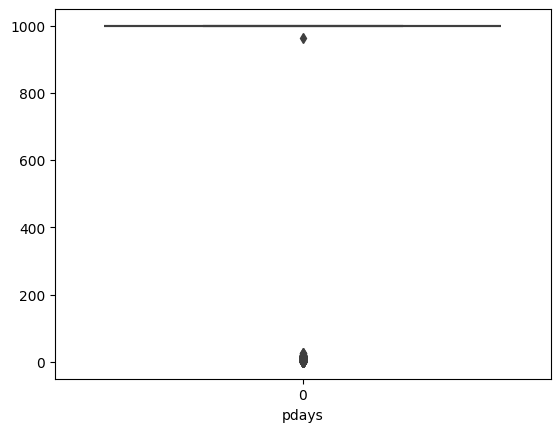

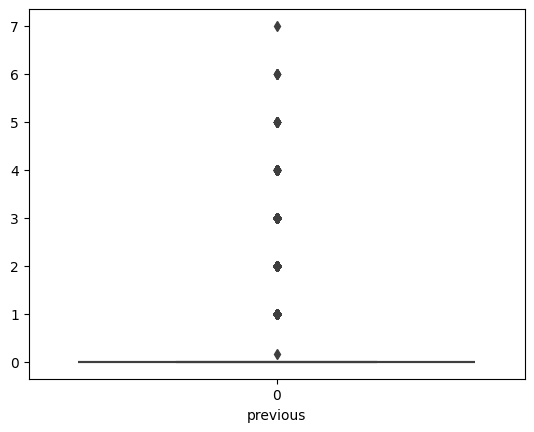

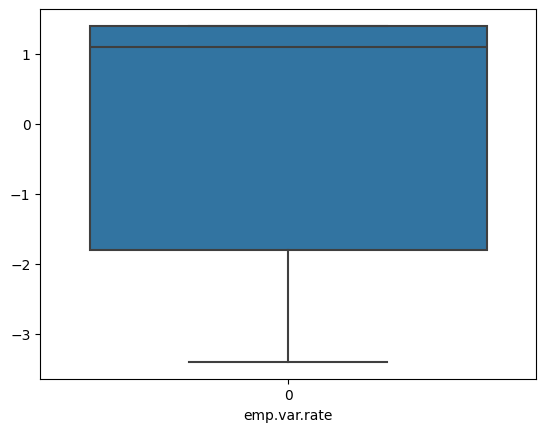

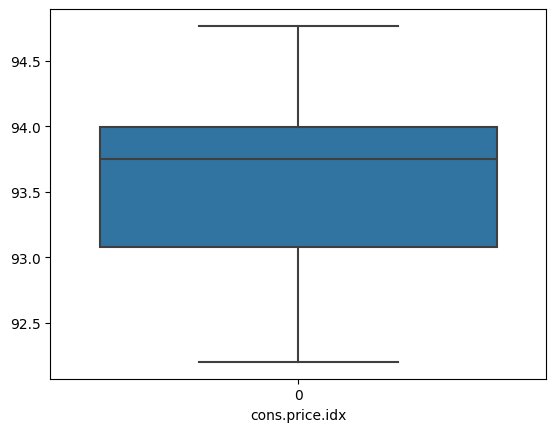

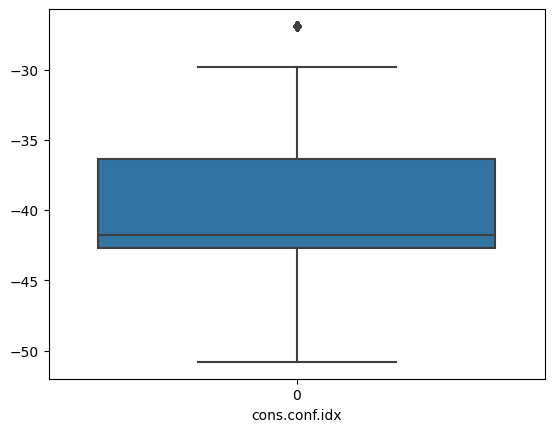

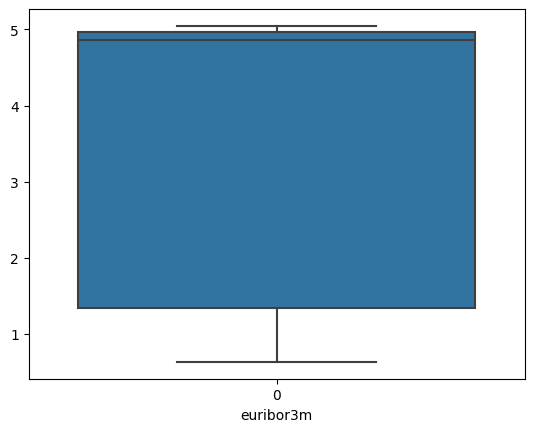

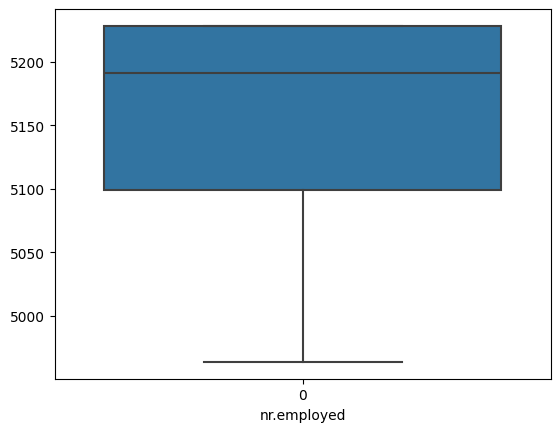

In [29]:
# 3) Check for Outliers

for i in df.columns: # This will access all the column one by one so we cn draw a box plot for them
  if df[i].dtype=="int64" or df[i].dtype=="float64" :
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

**We are not going to remove outliers in this data beacuse we are having real values**

In [30]:
# Lest check how many persons wre there wit different different age
df["age"].value_counts()

age
31.000000    1947
32.000000    1845
33.000000    1833
36.000000    1779
35.000000    1758
             ... 
40.030319       2
98.000000       2
91.000000       2
87.000000       1
95.000000       1
Name: count, Length: 79, dtype: int64

In [31]:
df.shape # We are left with 41,1183 rows and 21 columns

(41183, 21)

In [32]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Loan_status
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994000,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41190,74.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,nonexistent,-1.1,94.767000,-50.8,1.028,4963.6,no
41193,94.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767000,-50.8,1.028,4963.6,no
41195,74.0,admin.,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767000,-50.8,1.028,4963.6,no
41196,74.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767000,-50.8,1.028,4963.6,no


# Apply Label Encoding to convert all categorical value to Numerical values

In [41]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()


In [42]:
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Loan_status
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41190,74.0,0,1,6,0,2,0,0,7,0,...,3.0,999.0,1.0,1,-1.1,94.767000,-50.8,1.028,4963.6,0
41193,94.0,5,1,5,0,2,0,0,7,0,...,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6,0
41195,74.0,0,1,5,0,2,0,0,7,0,...,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6,0
41196,74.0,5,1,6,0,2,0,0,7,0,...,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6,0


In [43]:
for i in df.columns:
  if df[i].dtype=="object":
    df[i]= le.fit_transform(df[i])

In [44]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Loan_status
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41190,74.0,0,1,6,0,2,0,0,7,0,...,3.0,999.0,1.0,1,-1.1,94.767000,-50.8,1.028,4963.6,0
41193,94.0,5,1,5,0,2,0,0,7,0,...,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6,0
41195,74.0,0,1,5,0,2,0,0,7,0,...,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6,0
41196,74.0,5,1,6,0,2,0,0,7,0,...,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6,0


In [45]:
# In loan status column

# NO = 0
# YES = 1

**Split the data into Independent and Dependent variable**

In [46]:
x= df.iloc[ : , :-1]  # Independent columns

y= df["Loan_status"]  # Dependent column , Target column

In [47]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0
1,57.0,7,1,3,1,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0
2,37.0,7,1,3,0,2,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,2,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41190,74.0,0,1,6,0,2,0,0,7,0,239.0,3.0,999.0,1.0,1,-1.1,94.767000,-50.8,1.028,4963.6
41193,94.0,5,1,5,0,2,0,0,7,0,239.0,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6
41195,74.0,0,1,5,0,2,0,0,7,0,239.0,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6
41196,74.0,5,1,6,0,2,0,0,7,0,239.0,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6


In [48]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41190    0
41193    0
41195    0
41196    0
41198    0
Name: Loan_status, Length: 41183, dtype: int32

**Model Building**

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train , x_test , y_train , y_test = train_test_split( x ,y , test_size= 0.30 , random_state=42)

In [51]:
'''
x_train = Independent variable of Training
y_train = Dependent variable of Training

x_test = Independent variable of Testing
y_test = Dependent variable of Testing

'''

'\nx_train = Independent variable of Training\ny_train = Dependent variable of Training\n\nx_test = Independent variable of Testing\ny_test = Dependent variable of Testing\n\n'

In [52]:
# Lets create a Logistic Regression model

from sklearn.linear_model import LogisticRegression

In [53]:
model_1 = LogisticRegression()

In [54]:
# Train the model
model_1.fit(x_train , y_train)

C:\Users\goswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
# Test the Model
ans = model_1.predict(x_test)

In [161]:
# Predicted loan status of testing data
ans

array([0, 1, 0, ..., 0, 0, 0])

In [162]:
# Actual loan status of testing data
y_test

,Loan_status
28879,0
24613,1
5383,0
31060,0
32773,0
...,...
14192,0
19765,0
26056,0
31372,0


In [163]:
# Create a DataFrame to compare actual value and predicted value side by side

newdf =pd.DataFrame(columns=["Actual loan_status" , "Predicted loan_status"])

# Lets enter the values in the DataFrame
newdf["Actual loan_status"]= y_test
newdf["Predicted loan_status"]=ans

newdf

,Actual loan_status,Predicted loan_status
28879,0,0
24613,1,1
5383,0,0
31060,0,0
32773,0,0
...,...,...
14192,0,0
19765,0,0
26056,0,0
31372,0,0


In [164]:
# Evaluate its performance

from sklearn.metrics import *

accuracy_score( ans , y_test)*100

90.93484419263456

In [165]:
confusion_matrix( ans , y_test)

array([[10719,   825],
       [  295,   516]])

In [ ]:
'''                         Actual value

                            Dog      Not Dog

                 Dog        TP        FP
Predicted value
                 Not Dog    FN        TN

TP = True Positive
FP = False Positive
FN = False Negative
FP = False Positive


Accuracy score = (TP+TN) / TP+TN+FP+FN
Accuracy score = (10719 +516)  / 10719 +516 + 825 +295
Accuracy sscore =  11235 / 12355
Accuracy_score =  90.93484419263456
'''

**How to try different different values of Random state to check which value gives us the highest accuracy_score**

In [169]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Loan_status
0,56.0,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
1,57.0,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,1,1.1,93.994000,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41190,74.0,0,1,6,0,2,0,0,7,0,...,3.0,999.0,1.0,1,-1.1,94.767000,-50.8,1.028,4963.6,0
41193,94.0,5,1,5,0,2,0,0,7,0,...,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6,0
41195,74.0,0,1,5,0,2,0,0,7,0,...,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6,0
41196,74.0,5,1,6,0,2,0,0,7,0,...,3.0,999.0,1.0,0,-1.1,94.767000,-50.8,1.028,4963.6,0


In [171]:
x = df.iloc[: , :-1]

y= df["Loan_status"]

In [177]:
# Create a list with different dfferent values of random state that you want to try
list1=[ 0 , 6, 10 ,24 ,42 ,50 , 60 ,100, 150 ,200 , 250 , 300, 350, 400, 450, 500]

In [178]:
# We will be getting some unwanted dwarning so
import warnings
warnings.filterwarnings("ignore")

In [182]:
for i in list1:
  x_train , x_test , y_train , y_test = train_test_split( x ,y , test_size= 0.05 , random_state=i)

  model_1 = LogisticRegression()
  # Train the model
  model_1.fit(x_train , y_train)
  # Test the Model
  ans = model_1.predict(x_test)
  # Finding accuracy score
  acc=accuracy_score( ans , y_test)*100
  print("With random state:",i , "The accuracy score is :",acc)

With random state: 0 The accuracy score is : 91.2135922330097
With random state: 6 The accuracy score is : 91.74757281553399
With random state: 10 The accuracy score is : 90.4368932038835
With random state: 24 The accuracy score is : 91.60194174757281
With random state: 42 The accuracy score is : 91.06796116504854
With random state: 50 The accuracy score is : 90.0
With random state: 60 The accuracy score is : 91.11650485436893
With random state: 100 The accuracy score is : 92.18446601941747
With random state: 150 The accuracy score is : 90.58252427184466
With random state: 200 The accuracy score is : 91.89320388349515
With random state: 250 The accuracy score is : 90.97087378640776
With random state: 300 The accuracy score is : 90.77669902912622
With random state: 350 The accuracy score is : 90.48543689320388
With random state: 400 The accuracy score is : 90.92233009708738
With random state: 450 The accuracy score is : 90.3883495145631
With random state: 500 The accuracy score is : 91.